In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [115]:
import scipy.io
from sklearn import svm
DEBUG=True

Problem 1. Train a linear SVM using raw pixels as features. Plot the error rate on a validation set versus the number of training ex- amples that you used to train your classifier. Make sure you set aside 10,000 training images as a validation set. The number of training ex- amples in your experiment should be 100, 200, 500, 1,000, 2,000, 5,000, and 10,000. At this stage, you should expect accuracies between 70% and 90%.


In [5]:
digit_data_test = scipy.io.loadmat("data/digit-dataset/test.mat")
digit_data_train = scipy.io.loadmat("data/digit-dataset/train.mat")

test_img= digit_data_test['test_images']
train_img= digit_data_train['train_images']
train_label= digit_data_train['train_labels']

In [81]:
#Flatten the 28x28 images into 784 pixel long vectors 
train_img_flat=[]
for i in np.arange(shape(train_img)[2]):
    train_img_flat.append(train_img[:,:,1].flatten())
train_img_flat= np.array(train_img_flat)

Setting aside 10,000 images for validation 

Since this data is sorted , we need to pick randomly from the sample 

In [110]:
#get a list of 10100 unique random numbers for indexing 
N=100
num_verification = 10000
s = set()
while len(s) < N+num_verification:
    s.add(random.randint(60000))
rand_idx=np.array(list(s))

In [117]:
train_subset = []
labels_subset = []
for i in rand_idx[:N]:
    train_subset.append(train_img_flat[i])
    labels_subset.append(train_label[:,0][i])
train_subset = np.array(train_subset)
labels_subset = np.array(labels_subset)
if (DEBUG) : print shape(train_subset)
if (DEBUG) :print shape(labels_subset)

(100, 784)
(100,)


In [120]:
#Creating 10000 verification subset 
verify_train_subset = []
verify_labels_subset = []
for i in rand_idx[N:num_verification+N]:
    verify_train_subset.append(train_img_flat[i])
    verify_labels_subset.append(train_label[:,0][i])
verify_train_subset = np.array(verify_train_subset)
verify_labels_subset = np.array(verify_labels_subset)
if (DEBUG) : print shape(verify_train_subset)
if (DEBUG) :print shape(verify_labels_subset)

(10000, 784)
(10000,)


In [125]:
clf = svm.LinearSVC()
clf.fit(train_subset,labels_subset)
result = clf.predict(verify_train_subset)

In [149]:
error_rate = benchmark(result,verify_labels_subset)[0]
wrong_labels = benchmark(result,verify_labels_subset)[1][0]
print error_rate

0.9037


In [17]:
# Code written by Kunal Marwaha on Piazza
import math

#benchmark.m, converted
def benchmark(pred_labels, true_labels):
    errors = pred_labels != true_labels
    err_rate = sum(errors) / float(len(true_labels))
    indices = errors.nonzero()
    return err_rate, indices

#montage_images.m, converted
def montage_images(images):
    num_images=min(1000,np.size(images,2))
    numrows=math.floor(math.sqrt(num_images))
    numcols=math.ceil(num_images/numrows)
    img=np.zeros((numrows*28,numcols*28));
    for k in range(num_images):
        r = k % numrows
        c = k // numrows
        img[r*28:(r+1)*28,c*28:(c+1)*28]=images[:,:,k];
    return img

In [150]:
# print wrong_labels
# i=9
# print verify_labels_subset[i]
# print result[i]

In [39]:
print shape(X)
print shape(y)

(2, 3)
(2,)


In [40]:
X = [[0, 0,0], [1, 1,1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [155]:
def q1(N,DEBUG=False):
    #Flatten the 28x28 images into 784 pixel long vectors 
    train_img_flat=[]
    for i in np.arange(shape(train_img)[2]):
        train_img_flat.append(train_img[:,:,1].flatten())
    train_img_flat= np.array(train_img_flat)
    #get a list of 10100 unique random numbers for indexing 
    num_verification = 10000
    s = set()
    while len(s) < N+num_verification:
        s.add(random.randint(60000))
    rand_idx=np.array(list(s))
    #Creating N number of Training set/Labels 
    train_subset = []
    labels_subset = []
    for i in rand_idx[:N]:
        train_subset.append(train_img_flat[i])
        labels_subset.append(train_label[:,0][i])
    train_subset = np.array(train_subset)
    labels_subset = np.array(labels_subset)
    if (DEBUG) : print shape(train_subset)
    if (DEBUG) :print shape(labels_subset)
    #Creating 10000 verification subset 
    verify_train_subset = []
    verify_labels_subset = []
    for i in rand_idx[N:num_verification+N]:
        verify_train_subset.append(train_img_flat[i])
        verify_labels_subset.append(train_label[:,0][i])
    verify_train_subset = np.array(verify_train_subset)
    verify_labels_subset = np.array(verify_labels_subset)
    if (DEBUG) : print shape(verify_train_subset)
    if (DEBUG) :print shape(verify_labels_subset)
    #Training SVM classifier
    clf = svm.LinearSVC()
    clf.fit(train_subset,labels_subset)
    result = clf.predict(verify_train_subset)
    error_rate = benchmark(result,verify_labels_subset)[0]
    wrong_labels = benchmark(result,verify_labels_subset)[1][0]
    return error_rate

In [158]:
err_lst = []
trainset_size = [100, 200, 500, 1000, 2000, 5000]
for i in trainset_size:
    err_lst.append(q1(i))

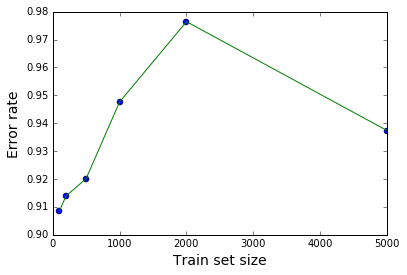

In [162]:
plt.plot(trainset_size,err_lst,'o')
plt.plot(trainset_size,err_lst,'-')
plt.xlabel("Train set size",fontsize=14)
plt.ylabel("Error rate",fontsize=14)

#References

- "1.4. Support Vector Machines." 1.4. Support Vector Machines — Scikit-learn 0.17 Documentation. N.p., n.d. Web. 01 Feb. 2016.